# Energy Minimization in Physics

## Problem Description

Energy minimization is fundamental in physics for determining the equilibrium state of a system. For example, finding the most stable configuration of particles involves minimizing the potential energy of the system. Optimization algorithms like BFGS can efficiently locate the minimum energy configuration by adjusting the positions of particles.

## Minimizing the Lennard-Jones Potential for Two Particles

The Lennard-Jones potential models the interaction between a pair of neutral atoms or molecules. It has a characteristic shape with a minimum representing the equilibrium bond length. We'll find the optimal distance between two particles that minimizes the Lennard-Jones potential.

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

where $V(r)$ is the potential energy, $r$ is the distance between particles, $\epsilon$ is the depth of the potential well, $\sigma$ is the finite distance at which the inter-particle potential is zero.

The optimized distance $r = \sigma$ is where the potential energy reaches its minimum, indicating the equilibrium separation between the two particles. And the minimum potential energy $V(r) = -\epsilon$ signifies the depth of the potential well, representing the strength of the interaction.



In [1]:
import matplotlib.pyplot as plt
from optymus.methods import bfgs
import jax.numpy as jnp

# Lennard-Jones potential
def lennard_jones(r, epsilon=1.0, sigma=1.0):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Objective function to minimize: Potential energy
def objective(r, epsilon=1.0, sigma=1.0):
    return lennard_jones(r, epsilon, sigma)

# Initial guess for r
initial_r = jnp.array([1.0])

# Bounds for r to avoid division by zero and unphysical distances
lower_bound = jnp.array([0.5])
upper_bound = jnp.array([3.0])
bounds = (lower_bound, upper_bound)

result = bfgs(f_obj=objective, x0=initial_r, bounds=bounds)

BFGS 0:   1%|          | 1/100 [00:00<01:29,  1.10it/s]


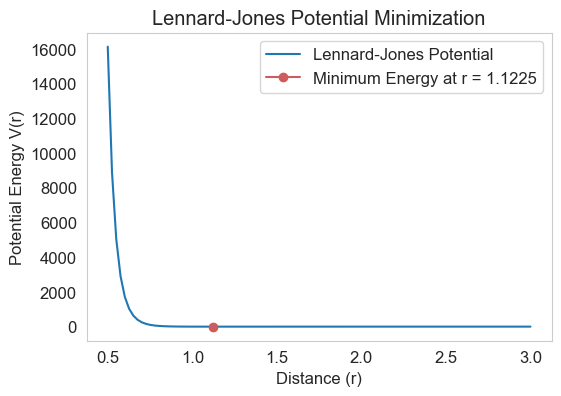

In [2]:
r_values = jnp.linspace(0.5, 3.0, 100)
V = lennard_jones(r_values)
optimized_r = result['xopt'].item()
min_potential = result['fmin'].item()

plt.figure(figsize=(6, 4))
plt.plot(r_values, V, label='Lennard-Jones Potential')
plt.plot(optimized_r, min_potential, 'indianred', marker='o', label=f'Minimum Energy at r = {optimized_r:.4f}')
plt.title('Lennard-Jones Potential Minimization')
plt.xlabel('Distance (r)')
plt.ylabel('Potential Energy V(r)')
plt.legend()
plt.grid()
plt.show()